# <center>Tugas Besar Individu Pembelajaran Mesin Lanjut</center>

<b>Topik</b>
Implementation of Swarm Intelligence

<b>Dikerjakan oleh</b>
Muhammad Ridho Sunation - 1301213038

<b>Url presentasi</b>
http: https://youtu.be/_7Ijcyb3-Qk

Fungsi yang dikerjakan

Tulis fungsi di sini
- Formula : F5 = $ F_5(x) = \sum_{i=1}^{n-1} \left( 100(-x_i^2 + x_{i+1})^2 + (x_i - 1)^2 \right) $


Range yang digunakan
- Misal: [-50, 50]

Algoritma yang digunakan
- ACO
<br> Algoritma Ant Colony Optimization (ACO)

**Kode** <br> Import Library yang kamu butuhkan :)

In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

**Fungsi F5** <br> Penjelasan : Fungsi ini merupakan fungsi objektif yang akan dioptimalkan. Ini adalah bentuk modifikasi dari fungsi Rosenbrock yang sering digunakan untuk pengujian algoritma optimasi.

In [ ]:
def F5(x):
    n = len(x)
    result = 0
    for i in range(n-1):
        term1 = 100 * (-x[i]**2 + x[i+1])**2
        term2 = (x[i] - 1)**2
        result += term1 + term2
    return result

**Parameter & Inisiasi** <br>


In [ ]:
bounds = [-50, 50] # Batas-batas wilayah pencarian solusi
num_ants = 50 # Jumlah semut dalam algoritma ACO
max_iter = 100 # Jumlah iterasi maksimum
evaporation_rate = 0.3 # Tingkat penguapan feromon pada setiap iterasi
alpha = 0.1  # Faktor randomisasi untuk pilihan jalur
beta = 0.03  # Tingkat ketertarikan terhadap makanan (food source)
food = np.array([0, 0])  # Lokasi makanan (food source)

**Fungsi Utama ACO**

In [ ]:
# ACO Algorithm
def AntColonyOptimization(bounds, num_ants, max_iter, evaporation_rate, alpha, beta, food):
    ants = np.random.uniform(low=bounds[0], high=bounds[1], size=(num_ants, 2)) # Inisialisasi posisi semut secara acak dalam wilayah pencarian solusi
    pheromone_map = np.zeros((400, 400)) # Matriks untuk merekam jejak pheromone pada grid
    history = [] # Penyimpanan histori posisi semut pada setiap iterasi
    best_solution = None # Inisialisasi solusi terbaik
    best_fitness = np.inf # Inisialisasi fitness terbaik

    for _ in range(max_iter):
        fitness = np.array([F5(ant) for ant in ants]) # Evaluasi fitness dari setiap posisi semut
        for i, fitness_value in enumerate(fitness): # Periksa apakah terdapat solusi yang lebih baik
            if fitness_value < best_fitness:
                best_fitness = fitness_value
                best_solution = ants[i].copy()

        history.append(ants.copy()) # Simpan histori posisi semut pada setiap iterasi

        for i, ant in enumerate(ants): # Update posisi semut berdasarkan pheromone dan tarikan ke makanan
            move_towards_center = beta * (food - ant)
            random_walk = alpha * np.random.randn(2)
            ant += move_towards_center + random_walk

            ant = np.clip(ant, bounds[0], bounds[1]) # Batasi posisi semut dalam wilayah pencarian solusi

            grid_pos = ((ant - bounds[0]) / (bounds[1] - bounds[0]) * 399).astype(int) # Hitung posisi semut dalam grid pheromone_map
            pheromone_map[grid_pos[0], grid_pos[1]] += 1 / fitness[i]  # Tambahkan pheromone berdasarkan fitness semut

        pheromone_map *= (1 - evaporation_rate)  # Kurangi intensitas pheromone pada setiap iterasi

    return best_solution, best_fitness, history, pheromone_map

# Run the ACO algorithm
best_solution, best_fitness, history, pheromone_map = AntColonyOptimization(bounds, num_ants, max_iter, evaporation_rate, alpha, beta, food)

Membuat Hasil GIF

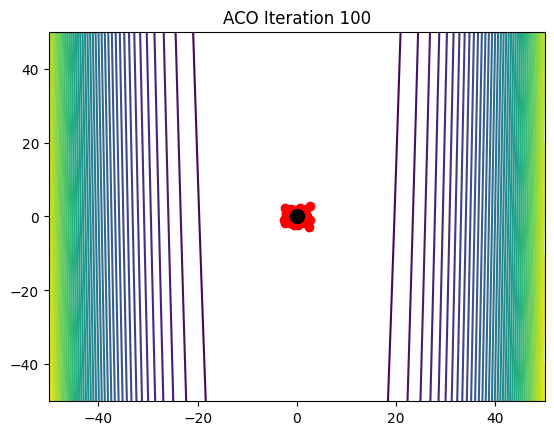

In [ ]:


# Persiapan data plot kontur
X1 = np.linspace(bounds[0], bounds[1], 400) # Membuat array titik-titik pada sumbu X1 dengan 400 titik yang tersebar secara merata dalam rentang batas
X2 = np.linspace(bounds[0], bounds[1], 400) # Membuat array titik-titik pada sumbu X2 dengan 400 titik yang tersebar secara merata dalam rentang batas
X1, X2 = np.meshgrid(X1, X2) # Membuat grid dari titik-titik X1 dan X2

# Menghitung nilai fungsi objektif F5 pada setiap titik dalam grid dengan mengubah grid menjadi array 1 dimensi,
# kemudian melakukan transformasi kolom dengan menumpuk kolom-kolom ke dalam satu array dan meratakan array tersebut kembali ke bentuk grid
Z = np.array([F5(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

# Atur gambar dan sumbu untuk animasi
fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[0], bounds[1])
contour = ax.contour(X1, X2, Z, levels=50) # Plot kontur dari fungsi objektif
scatter = ax.scatter([], [], c='red')  # Titik-titik yang merepresentasikan posisi semut
food_plot = ax.scatter([food[0]], [food[1]], c='black', s=100, marker='o')  # Plot lokasi makanan

# Fungsi pembaruan untuk animasi
def update(frame):
    ax.set_title(f'ACO Iteration {frame + 1}') # Update judul plot dengan nomor iterasi
    positions = history[frame] # Ambil posisi semut dari histori pada iterasi tertentu
    scatter.set_offsets(positions) # Atur posisi semut
    return scatter,

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

# Simpan animasi sebagai GIF
writer = PillowWriter(fps=5)
ani.save("ant_colony_optimization_1301213291.gif", writer=writer)
plt.show()

# Buat hasil GIF (3D Animation)

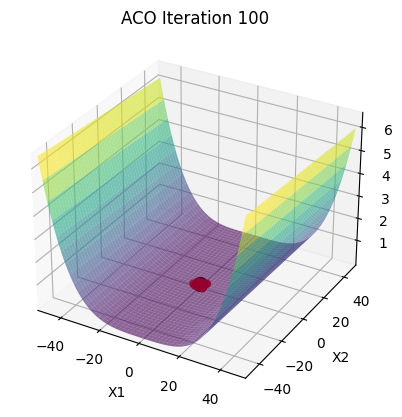

In [ ]:


from mpl_toolkits.mplot3d import Axes3D

# Atur gambar dan sumbu untuk animasi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[0], bounds[1])
ax.set_zlim(np.min(Z), np.max(Z))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('F5')
contour = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.6)
scatter = ax.scatter([], [], [], c='red')  # Titik-titik yang merepresentasikan posisi semut
food_plot = ax.scatter([food[0]], [food[1]], [F5(food)], c='black', s=100, marker='o')  # Plot lokasi makanan

# Fungsi pembaruan untuk animasi
def update(frame):
    ax.set_title(f'ACO Iteration {frame + 1}') # Update judul plot dengan nomor iterasi
    positions = history[frame] # Ambil posisi semut dari histori pada iterasi tertentu
    fitness = np.array([F5(ant) for ant in positions]) # Evaluasi fitness dari setiap posisi semut
    scatter._offsets3d = (positions[:, 0], positions[:, 1], fitness) # Atur posisi semut
    return scatter,

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

# Simpan animasi sebagai GIF
writer = PillowWriter(fps=5)
ani.save("ant_colony_optimization_3D.gif", writer=writer)
plt.show()


# Analisis

Berdasarkan kegiatan yang kita lakukan di dapat hasil kesimpulan <br> Algoritma Ant Colony Optimization (ACO)

**Kelebihan**<br>**1.Berbasis Pheromone**: ACO menggunakan jejak pheromone untuk memandu pencarian, memungkinkan eksplorasi jalur yang lebih efisien.<br>**2.Heuristik dan Randomisasi**: Memanfaatkan informasi heuristik dan randomisasi dalam gerakan semut, sehingga mampu menghindari jebakan lokal minima dan mendiversifikasi pencarian.<br>**3.Iterasi dan Kolaborasi**: Iterasi yang berulang dan kolaborasi antar semut meningkatkan kemungkinan menemukan solusi optimal.

**Kekurangan**<br>**1.Kompleksitas Waktu**: Perhitungan pheromone dan evaluasi fitness setiap iterasi memerlukan waktu komputasi yang signifikan.<br>**2.Pemilihan Parameter**: Sensitif terhadap pemilihan parameter seperti tingkat penguapan pheromone, alpha, dan beta.<br>**3.Eksplorasi vs Eksploitasi**: Terkadang menghadapi kesulitan dalam menyeimbangkan antara eksplorasi dan eksploitasi, terutama dalam ruang pencarian yang sangat besar.

**Kesimpulan** <br> **ACO** adalah pilihan yang lebih baik untuk masalah yang kompleks dan memerlukan pencarian jalur yang efektif dengan eksplorasi intensif, meskipun dengan biaya komputasi yang lebih tinggi. Sementara itu, **RAO3** adalah alternatif yang lebih sederhana dan efisien untuk masalah optimasi yang lebih sederhana atau ketika waktu komputasi menjadi prioritas utama. Pemilihan antara ACO dan RAO3 sangat bergantung pada sifat masalah yang dihadapi dan prioritas dalam hal waktu komputasi versus kualitas solusi.